<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/1_underfitting_and_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAst amended: 1st June, 2023
# Ref: https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting
# Data: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.

# Problems with decision trees

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions.  But what alternatives do you have for models?

You can see in scikit-learn's [documentation](https://scikit-learn.org/stable/modules/tree.html#tree) that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth.  A tree's depth is a measure of how many splits it makes before coming to a prediction.  This is a relatively shallow tree

![Depth 2 Tree](https://storage.googleapis.com/kaggle-media/learn/images/R3ywQsR.png)

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf.  As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses.  If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses.  Splitting each of those again would create 8 groups.  If we keep doubling the number of groups by adding more splits at each level, we'll have \\(2^{10}\\) groups of houses by the time we get to the 10th level. That's 1024 leaves.  

When we divide the houses amongst many leaves, we also have fewer houses in each leaf.  Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.  On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.  

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.  

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.  Visually, we want the low point of the (red) validation curve in the figure below.

![underfitting_overfitting](https://storage.googleapis.com/kaggle-media/learn/images/AXSEOfI.png)

# Example
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes.  But the *max_leaf_nodes* argument provides a very sensible way to control overfitting vs underfitting.  The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for *max_leaf_nodes*:


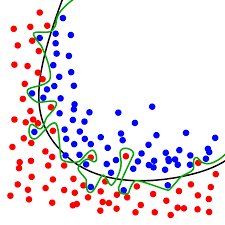

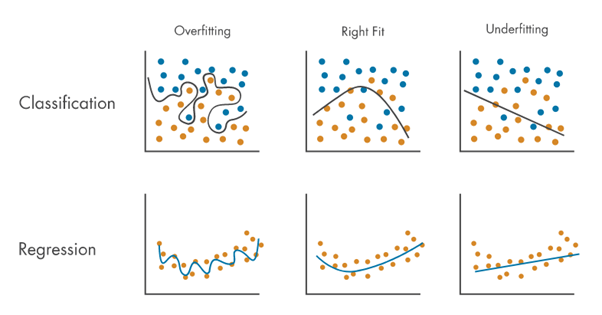

### Reduce overfitting by:

> Cross-validation: Select a model after judging its performance through multiple folds    
>Regularization: Penalize models that are complex    
>Tree Pruning: Collapse leaves into a subtree  
>Dropouts: USed in neural networks to stop coadaptations  

In the following figure decision tree will also fit the two points right in the middle of crosses even though they are errors/noises.

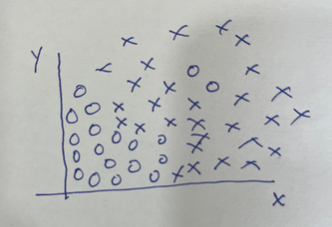

In [1]:
# 1.0 Data Loading Code Runs At This Point
import pandas as pd

# 1.0.1
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

# 1.0.2
from pathlib import Path

In [2]:
# 1.0.3 Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 1.1 Path to data folder:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/mobile_price"

In [4]:
# 1.11 path + Filename:

path = Path(pathToFolder) / "train.csv"

In [5]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [6]:
# 1.3 Load data:

X = pd.read_csv(path)

In [7]:
# 1.3.1 About data:

X.shape   # (2000, 21)
X.head()

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# 1.3.2 Data types:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# 1.2 How many unique values each column has:

for i in X.columns:
  print(i, X[i].nunique())

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4


In [10]:
# 1.5 Filter rows with missing values
X.isnull().sum().sum()

0

In [11]:
# 2.0 Choose target and features
y = X.ram
X.pop('ram')

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [12]:
# 2.1 Split data into training and validation data, for both features and target:

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [13]:
# 3.0 A function to model and also to calculate MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 3.2 Train model
    model.fit(train_X, train_y)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)

The data is loaded into **train_X**, **val_X**, **train_y** and **val_y** using the code you've already seen (and which you've already written).

We can use a for-loop to compare the accuracy of models built with different values for *max_leaf_nodes.*

In [14]:
# 3.1 Compare MAE with differing values of max_leaf_nodes:
#  Get

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")

Max leaf nodes: 5 		 Mean Absolute Error: 328.0137400362019
Max leaf nodes: 50 		 Mean Absolute Error: 292.86164271266836
Max leaf nodes: 500 		 Mean Absolute Error: 341.3223753093312
Max leaf nodes: 5000 		 Mean Absolute Error: 346.292



Of the options listed, 500 is the optimal number of leaves.

---

# Conclusion

Here's the takeaway: Models can suffer from either:
- **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- **Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions.

We use **validation** data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

# Your Turn

Go to github [site of ifood business](https://github.com/nailson/ifood-data-business-analyst-test) . Download the data file *ifood_df.csv*. The target feature is *'Response'*. Determine optimum number of maximum decisiontree leaves. Test <i> [5,10,15,20,50,100,200,500,5000] </i>. It is a classification problem and accuracy is the metrics. My <u>gdrive repo</u> is <b>colab_data_files/ifood_business</b>.